# Project 1 - Basic Data Analytics with Pandas

Data exploration and data analysis on rich and messy real-world dataset on housing market.
* libraries: 
    * pandas
    * numpy
* read and write data: pd.read_csv, df.to_csv
* select features: 
     - num_var=list(df.select_dtypes(include=np.number))
     - num_var.remove('id')
* select dataframe:
     - two columns, 5 rows: df[:5][['id','price_doc']]
     - query:
         * df[(df.full_sq>10) & (df.full_sq<1500)]
         * df.query('full_sq>10 and full_sq<1500')
     - update values:
         * sq_index = df.query('full_sq<life_sq').index
         * df.loc[sq_index,'life_sq'] = np.NaN
     - drop columns:
         * df.drop('log_price',axis=1,inplace=True)
* group data:
     - value_counts: 
         * na: df.life_sq.isna().sum()
         * df.product_type.value_counts()
         * df.product_type.value_counts(normalize=True)
     - hierachical group:
         * grouped=df.groupby(['product_type','state']).size()
         * grouped.unstack(level='state')
     - calculate median:
         * df[['product_type','price_doc']].groupby('product_type').median()
         * df.pivot_table(index='product_type', values='price_doc', aggfunc=np.median)
     - apply function:
         * df[['life_sq','num_room']].apply(lambda x: x[0]/x[1], axis=1)
         * time: 
           * df['timestamp'] = pd.to_datetime(df.timestamp)
           * df['ts_year']=df['timestamp'].apply(lambda x:x.year)
* plot data:
     - histgram:
         * df.price_doc.hist(bins=100)
         * df.price_doc.plot(kind='hist')
         * df.price_doc.plot.hist()
     - log data:
         * df['log_price']=np.log(df['price_doc'].values)
         * plt.hist(df['log_price'],bins=100); plt.grid()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

**Q1: Read the dataset from csv file, and call it housing_data**

In [2]:
df=pd.read_csv("dataset.csv")

**Q2: Preview the first 10 rows with head().**

* head()
* tail()

In [3]:
df.head(10)

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452
5,6,2011-09-06,67,46.0,14.0,NaN,NaN,NaN,NaN,NaN,...,62,14,1,53,78,1,20,113,17,9100000
6,7,2011-09-08,25,14.0,10.0,NaN,NaN,NaN,NaN,NaN,...,81,16,3,38,80,1,27,127,8,5500000
7,8,2011-09-09,44,44.0,5.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,11,18,1,0,47,4,2000000
8,9,2011-09-10,42,27.0,5.0,NaN,NaN,NaN,NaN,NaN,...,19,8,1,18,34,1,3,85,11,5300000
9,10,2011-09-13,36,21.0,9.0,NaN,NaN,NaN,NaN,NaN,...,19,13,0,10,20,1,3,67,1,2000000


**Q3: How many columns and rows are there in the data?**

In [5]:
df.shape

(30471, 292)

In [6]:
df.shape[0]

30471

In [7]:
df.shape[1]

292

**Q4: Which features/columns are available in the data? Display the features.**

In [8]:
#index
df.columns

Index(['id', 'timestamp', 'full_sq', 'life_sq', 'floor', 'max_floor',
       'material', 'build_year', 'num_room', 'kitch_sq',
       ...
       'cafe_count_5000_price_2500', 'cafe_count_5000_price_4000',
       'cafe_count_5000_price_high', 'big_church_count_5000',
       'church_count_5000', 'mosque_count_5000', 'leisure_count_5000',
       'sport_count_5000', 'market_count_5000', 'price_doc'],
      dtype='object', length=292)

In [9]:
#array
df.columns.values

array(['id', 'timestamp', 'full_sq', 'life_sq', 'floor', 'max_floor',
       'material', 'build_year', 'num_room', 'kitch_sq', 'state',
       'product_type', 'sub_area', 'area_m', 'raion_popul',
       'green_zone_part', 'indust_part', 'children_preschool',
       'preschool_quota', 'preschool_education_centers_raion',
       'children_school', 'school_quota',
       'school_education_centers_raion',
       'school_education_centers_top_20_raion', 'hospital_beds_raion',
       'healthcare_centers_raion', 'university_top_20_raion',
       'sport_objects_raion', 'additional_education_raion',
       'culture_objects_top_25', 'culture_objects_top_25_raion',
       'shopping_centers_raion', 'office_raion',
       'thermal_power_plant_raion', 'incineration_raion',
       'oil_chemistry_raion', 'radiation_raion',
       'railroad_terminal_raion', 'big_market_raion',
       'nuclear_reactor_raion', 'detention_facility_raion', 'full_all',
       'male_f', 'female_f', 'young_all', 'young_male',

**Q5: What's the data type of each column? Save the datatype as data_type.**

In [10]:
df.dtypes.groupby(df.dtypes.values).size()

int64      157
float64    119
object      16
dtype: int64

In [57]:
df.dtypes

id                                                int64
timestamp                                datetime64[ns]
full_sq                                           int64
life_sq                                         float64
floor                                           float64
max_floor                                       float64
material                                        float64
build_year                                      float64
num_room                                        float64
kitch_sq                                        float64
state                                           float64
product_type                                     object
sub_area                                         object
area_m                                          float64
raion_popul                                       int64
green_zone_part                                 float64
indust_part                                     float64
children_preschool                              

In [58]:
for i in range(len(df.dtypes)):
    print (df.dtypes.index[i], df.dtypes[i])

id int64
timestamp datetime64[ns]
full_sq int64
life_sq float64
floor float64
max_floor float64
material float64
build_year float64
num_room float64
kitch_sq float64
state float64
product_type object
sub_area object
area_m float64
raion_popul int64
green_zone_part float64
indust_part float64
children_preschool int64
preschool_quota float64
preschool_education_centers_raion int64
children_school int64
school_quota float64
school_education_centers_raion int64
school_education_centers_top_20_raion int64
hospital_beds_raion float64
healthcare_centers_raion int64
university_top_20_raion int64
sport_objects_raion int64
additional_education_raion int64
culture_objects_top_25 object
culture_objects_top_25_raion int64
shopping_centers_raion int64
office_raion int64
thermal_power_plant_raion object
incineration_raion object
oil_chemistry_raion object
radiation_raion object
railroad_terminal_raion object
big_market_raion object
nuclear_reactor_raion object
detention_facility_raion object
full_all

**Q6: Which variables are numerical variables (excluding 'id')? Put all the numerical variable in list.**

* Hint: Use the index of the data_type we just created in Q5. 
* Numerical variables: int/float. 
* Remenber to remove the 'id'.

In [60]:
#num_var=df.dtypes[df.dtypes.isin(['int','float'])]
#num_var
# Q: only shows float type

In [62]:
#answers version.
num_vars = list(df.dtypes[df.dtypes=='int64'].index) + list(df.dtypes[df.dtypes=='float64'].index)
print(len(num_vars))
num_vars
# Q: same 279. life_sq at the back.

279


['id',
 'full_sq',
 'raion_popul',
 'children_preschool',
 'preschool_education_centers_raion',
 'children_school',
 'school_education_centers_raion',
 'school_education_centers_top_20_raion',
 'healthcare_centers_raion',
 'university_top_20_raion',
 'sport_objects_raion',
 'additional_education_raion',
 'culture_objects_top_25_raion',
 'shopping_centers_raion',
 'office_raion',
 'full_all',
 'male_f',
 'female_f',
 'young_all',
 'young_male',
 'young_female',
 'work_all',
 'work_male',
 'work_female',
 'ekder_all',
 'ekder_male',
 'ekder_female',
 '0_6_all',
 '0_6_male',
 '0_6_female',
 '7_14_all',
 '7_14_male',
 '7_14_female',
 '0_17_all',
 '0_17_male',
 '0_17_female',
 '16_29_all',
 '16_29_male',
 '16_29_female',
 '0_13_all',
 '0_13_male',
 '0_13_female',
 'ID_metro',
 'ID_railroad_station_avto',
 'ID_big_road1',
 'ID_big_road2',
 'ID_railroad_terminal',
 'ID_bus_terminal',
 'office_count_500',
 'office_sqm_500',
 'trc_count_500',
 'trc_sqm_500',
 'cafe_count_500',
 'cafe_count_500_

In [61]:
num_var=list(df.select_dtypes(include=np.number))
print(len(num_var))
num_var

279


['id',
 'full_sq',
 'life_sq',
 'floor',
 'max_floor',
 'material',
 'build_year',
 'num_room',
 'kitch_sq',
 'state',
 'area_m',
 'raion_popul',
 'green_zone_part',
 'indust_part',
 'children_preschool',
 'preschool_quota',
 'preschool_education_centers_raion',
 'children_school',
 'school_quota',
 'school_education_centers_raion',
 'school_education_centers_top_20_raion',
 'hospital_beds_raion',
 'healthcare_centers_raion',
 'university_top_20_raion',
 'sport_objects_raion',
 'additional_education_raion',
 'culture_objects_top_25_raion',
 'shopping_centers_raion',
 'office_raion',
 'full_all',
 'male_f',
 'female_f',
 'young_all',
 'young_male',
 'young_female',
 'work_all',
 'work_male',
 'work_female',
 'ekder_all',
 'ekder_male',
 'ekder_female',
 '0_6_all',
 '0_6_male',
 '0_6_female',
 '7_14_all',
 '7_14_male',
 '7_14_female',
 '0_17_all',
 '0_17_male',
 '0_17_female',
 '16_29_all',
 '16_29_male',
 '16_29_female',
 '0_13_all',
 '0_13_male',
 '0_13_female',
 'raion_build_count_wit

In [17]:
num_var.remove('id');num_var

['full_sq',
 'life_sq',
 'floor',
 'max_floor',
 'material',
 'build_year',
 'num_room',
 'kitch_sq',
 'state',
 'area_m',
 'raion_popul',
 'green_zone_part',
 'indust_part',
 'children_preschool',
 'preschool_quota',
 'preschool_education_centers_raion',
 'children_school',
 'school_quota',
 'school_education_centers_raion',
 'school_education_centers_top_20_raion',
 'hospital_beds_raion',
 'healthcare_centers_raion',
 'university_top_20_raion',
 'sport_objects_raion',
 'additional_education_raion',
 'culture_objects_top_25_raion',
 'shopping_centers_raion',
 'office_raion',
 'full_all',
 'male_f',
 'female_f',
 'young_all',
 'young_male',
 'young_female',
 'work_all',
 'work_male',
 'work_female',
 'ekder_all',
 'ekder_male',
 'ekder_female',
 '0_6_all',
 '0_6_male',
 '0_6_female',
 '7_14_all',
 '7_14_male',
 '7_14_female',
 '0_17_all',
 '0_17_male',
 '0_17_female',
 '16_29_all',
 '16_29_male',
 '16_29_female',
 '0_13_all',
 '0_13_male',
 '0_13_female',
 'raion_build_count_with_mater

**Q7: Select the first 5 rows with 'id' (the 1st column) and 'price_doc' (the last column) columns from the data.**

* several ways to solve this question. 

In [18]:
df[:5][['id','price_doc']]
#data[['id','price_doc']][:5]

,id,price_doc
0,1,5850000
1,2,6000000
2,3,5700000
3,4,13100000
4,5,16331452


In [19]:
df.loc[:4,['id','price_doc']]

,id,price_doc
0,1,5850000
1,2,6000000
2,3,5700000
3,4,13100000
4,5,16331452


In [20]:
df.iloc[:5,[0,-1]]

,id,price_doc
0,1,5850000
1,2,6000000
2,3,5700000
3,4,13100000
4,5,16331452


In [21]:
#3 rows
df[:3]

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000


In [22]:
#0-3 rows, 4 rows.
df.loc[:3]

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000


**Q8: Select the rows with the full area larger than 10 and smaller than 1500. Full area is indicated by 'full_sq'.**

Hint: You can use boolean indexing or query. Try both methods.

In [23]:
# http://pandas.pydata.org/pandas-docs/version/0.15.2/indexing.html#boolean-indexing
df[(df.full_sq>10)&(df.full_sq<1500)]

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452
5,6,2011-09-06,67,46.0,14.0,NaN,NaN,NaN,NaN,NaN,...,62,14,1,53,78,1,20,113,17,9100000
6,7,2011-09-08,25,14.0,10.0,NaN,NaN,NaN,NaN,NaN,...,81,16,3,38,80,1,27,127,8,5500000
7,8,2011-09-09,44,44.0,5.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,11,18,1,0,47,4,2000000
8,9,2011-09-10,42,27.0,5.0,NaN,NaN,NaN,NaN,NaN,...,19,8,1,18,34,1,3,85,11,5300000
9,10,2011-09-13,36,21.0,9.0,NaN,NaN,NaN,NaN,NaN,...,19,13,0,10,20,1,3,67,1,2000000


In [24]:
df.query("full_sq>10 & full_sq<1500")

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452
5,6,2011-09-06,67,46.0,14.0,NaN,NaN,NaN,NaN,NaN,...,62,14,1,53,78,1,20,113,17,9100000
6,7,2011-09-08,25,14.0,10.0,NaN,NaN,NaN,NaN,NaN,...,81,16,3,38,80,1,27,127,8,5500000
7,8,2011-09-09,44,44.0,5.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,11,18,1,0,47,4,2000000
8,9,2011-09-10,42,27.0,5.0,NaN,NaN,NaN,NaN,NaN,...,19,8,1,18,34,1,3,85,11,5300000
9,10,2011-09-13,36,21.0,9.0,NaN,NaN,NaN,NaN,NaN,...,19,13,0,10,20,1,3,67,1,2000000


**Q9: Find the index of the rows with full area ('full_sq') smaller than living area ('life_sq'). Change the 'life_sq' in these rows to NAN.**

In [25]:
#get index first
sq_index=df[df.full_sq<df.life_sq].index

In [26]:
df.loc[sq_index,'life_sq']=np.NaN

**Q10: Check how many rows in life_sq are NAN?**

In [27]:
#data.isnull().sum()

In [28]:
df.life_sq.isna().sum()

6420

In [29]:
df.life_sq.isna().value_counts()

False    24051
True      6420
Name: life_sq, dtype: int64

**Q11: The 'product_type' column tells us whether this housing is a owner-occupier purchase or investment. Which type is more common? What's the percentage of each type?**

In [30]:
df.product_type.value_counts()

Investment       19448
OwnerOccupier    11023
Name: product_type, dtype: int64

In [31]:
df.product_type.value_counts(normalize=True)

Investment       0.638246
OwnerOccupier    0.361754
Name: product_type, dtype: float64

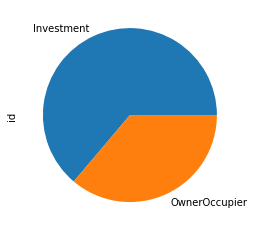

In [32]:
df.groupby("product_type").count()['id'].plot.pie()

**Q12: Group the data by 'product_type' and calculate the median price for each type. The price is indicated by 'price_doc' column.**

Hint: If you choose .aggragate() method, use np.median for the median calculation.

In [33]:
df[['product_type','price_doc']].groupby('product_type').median()

,price_doc
product_type,
Investment,6670000
OwnerOccupier,5564090


In [34]:
df[['product_type','price_doc']].groupby('product_type').aggregate(np.median)

,price_doc
product_type,
Investment,6670000
OwnerOccupier,5564090


In [35]:
df.pivot_table(index='product_type', values='price_doc', aggfunc=np.median)

,price_doc
product_type,
Investment,6670000
OwnerOccupier,5564090


In [36]:
df.groupby('product_type')['price_doc'].median()

product_type
Investment       6670000
OwnerOccupier    5564090
Name: price_doc, dtype: int64

**Q13: Check how many houses are there in each product type and each state. First group by product_type and then group by state. Name this as grouped**

In [37]:
grouped_state=df.groupby(['product_type','state']).sum()['id'];grouped_state

product_type   state
Investment     1.0       10633238
               2.0      115215670
               3.0      111063104
               4.0        8016790
               33.0         10092
OwnerOccupier  1.0       93949223
               2.0         808878
               3.0        2684406
               4.0         172646
Name: id, dtype: int64

In [38]:
df.groupby(['product_type','state']).size()

product_type   state
Investment     1.0       520
               2.0      5802
               3.0      5653
               4.0       413
               33.0        1
OwnerOccupier  1.0      4335
               2.0        42
               3.0       137
               4.0         9
dtype: int64

**Q14: Unstack the state index in grouped.**

* unstack(): turn the index values into column names.

In [39]:
grouped_state.unstack()

state,1.0,2.0,3.0,4.0,33.0
product_type,,,,,
Investment,10633238.0,115215670.0,111063104.0,8016790.0,10092.0
OwnerOccupier,93949223.0,808878.0,2684406.0,172646.0,NaN


In [40]:
#grouped_state.unstack(level='state')

**Q15: Add a new feature called 'room_size', which indicated the average living area in each room of a housing. 'num_room' is the column that shows the number of rooms.**


In [41]:
df['room_size']=df.life_sq/df.num_room
#data.room_size

In [43]:
df[['life_sq','num_room']].apply(lambda x: x[0]/x[1], axis=1)

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
5              NaN
6              NaN
7              NaN
8              NaN
9              NaN
10             NaN
11             NaN
12             NaN
13             NaN
14             NaN
15             NaN
16             NaN
17             NaN
18             NaN
19             NaN
20             NaN
21             NaN
22             NaN
23             NaN
24             NaN
25             NaN
26             NaN
27             NaN
28             NaN
29             NaN
           ...    
30441     0.250000
30442    40.000000
30443          NaN
30444          NaN
30445    47.000000
30446    41.000000
30447          NaN
30448          NaN
30449    47.000000
30450          NaN
30451          NaN
30452    19.000000
30453     1.000000
30454    13.000000
30455    26.333333
30456    15.000000
30457    14.333333
30458     1.000000
30459          NaN
30460    16.000000
30461    19.000000
30462    30.

**Q16: Change the format of timestamp to '%Y-%m-%d'.**

Hint: For more info about timestamp in pandas, read [this document](https://pandas.pydata.org/pandas-docs/stable/timeseries.html). 

In [44]:
#2011-08-20
df.timestamp=pd.to_datetime(df.timestamp)
df.timestamp

0       2011-08-20
1       2011-08-23
2       2011-08-27
3       2011-09-01
4       2011-09-05
5       2011-09-06
6       2011-09-08
7       2011-09-09
8       2011-09-10
9       2011-09-13
10      2011-09-16
11      2011-09-16
12      2011-09-17
13      2011-09-19
14      2011-09-19
15      2011-09-20
16      2011-09-20
17      2011-09-20
18      2011-09-22
19      2011-09-22
20      2011-09-22
21      2011-09-22
22      2011-09-23
23      2011-09-23
24      2011-09-23
25      2011-09-24
26      2011-09-26
27      2011-09-26
28      2011-09-26
29      2011-09-27
           ...    
30441   2015-06-27
30442   2015-06-27
30443   2015-06-27
30444   2015-06-27
30445   2015-06-27
30446   2015-06-27
30447   2015-06-27
30448   2015-06-27
30449   2015-06-27
30450   2015-06-29
30451   2015-06-29
30452   2015-06-29
30453   2015-06-29
30454   2015-06-29
30455   2015-06-29
30456   2015-06-29
30457   2015-06-29
30458   2015-06-29
30459   2015-06-29
30460   2015-06-29
30461   2015-06-30
30462   2015

In [4]:
df['timestamp']=pd.to_datetime(df['timestamp'], format='%Y-%m-%d')
df.timestamp

0       2011-08-20
1       2011-08-23
2       2011-08-27
3       2011-09-01
4       2011-09-05
           ...    
30466   2015-06-30
30467   2015-06-30
30468   2015-06-30
30469   2015-06-30
30470   2015-06-30
Name: timestamp, Length: 30471, dtype: datetime64[ns]

In [45]:
df['ts_year'] = df['timestamp'].dt.year
df['ts_dayofweek'] = df['timestamp'].dt.weekday_name

df.loc[0:5,['timestamp','ts_year','ts_dayofweek']]

,timestamp,ts_year,ts_dayofweek
0,2011-08-20,2011,Saturday
1,2011-08-23,2011,Tuesday
2,2011-08-27,2011,Saturday
3,2011-09-01,2011,Thursday
4,2011-09-05,2011,Monday
5,2011-09-06,2011,Tuesday


In [46]:
df['ts_year'] = pd.DatetimeIndex(df.timestamp).year
df['ts_dayofweek'] = pd.DatetimeIndex(df.timestamp).dayofweek

In [47]:
df.loc[0:5,['timestamp','ts_year','ts_dayofweek']]

,timestamp,ts_year,ts_dayofweek
0,2011-08-20,2011,5
1,2011-08-23,2011,1
2,2011-08-27,2011,5
3,2011-09-01,2011,3
4,2011-09-05,2011,0
5,2011-09-06,2011,1


**Q17: Add new features called 'ts_year' and 'ts_dayofweek', which indicate the year and the number of the day of the week.**

Hint: you can use apply() to apply functions to the data.

In [48]:
df['ts_year']=df['timestamp'].apply(lambda x:x.year)
df['ts_dayofweek']=df['timestamp'].apply(lambda x:x.dayofweek)

In [49]:
df.loc[0:5,['timestamp','ts_year','ts_dayofweek']]

,timestamp,ts_year,ts_dayofweek
0,2011-08-20,2011,5
1,2011-08-23,2011,1
2,2011-08-27,2011,5
3,2011-09-01,2011,3
4,2011-09-05,2011,0
5,2011-09-06,2011,1


**Q18: Draw histogram of price to see the distribution.**

Hint: You can use matplotlib or pandas for this histogram. 

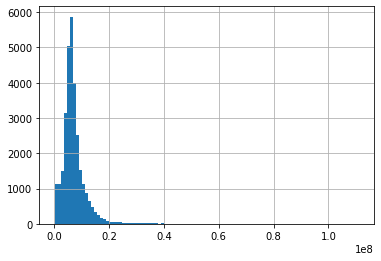

In [50]:
df['price_doc'].hist(bins=100)

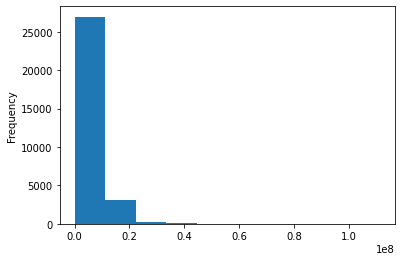

In [51]:
df.price_doc.plot(kind='hist')

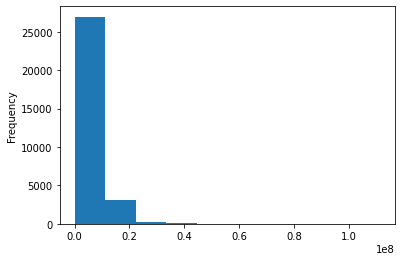

In [52]:
df.price_doc.plot.hist()

**Q19: From the plot in Q18, most of the data have smaller values and the right tail of the distribution is very long. Apply a logorithm transformation to price and add this as a new feature called 'log_price'.**

In [53]:
df["log_price"]=np.log(df['price_doc'])
#data.head(5)

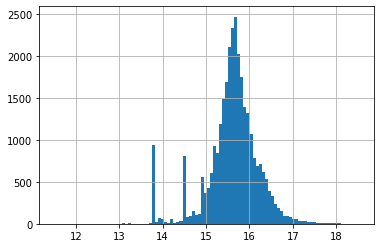

In [54]:
plt.hist(df.log_price,bins=100)
plt.grid()

**Q20: Drop the log_price column.**

In [55]:
df.drop('log_price',axis=1,inplace=True)
#data.head(5)

**Q21: Save the dataframe we have now to housing_data_new.csv file**

In [56]:
df.to_csv("housing_data_new.csv")